참고 이해 필요
- https://www.youtube.com/watch?v=3kOa1d_2ZmU
- https://www.youtube.com/watch?v=YEkrjuyrtG0

In [2]:
import glob

! pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import save_model 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,Dense, SimpleRNN,Dropout
import numpy as np
from PIL import Image

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

##### 데이터 준비

In [3]:
#https://keras.io/api/preprocessing/image/    
#: target_size
#: Either None (default to original size) 
#or tuple of ints (img_height, img_width).
# 244*244  -> 432*288  을 가로 세로 변경해야 크롭 안되고 전체 다 나옴
# 이미지 리사이징
image = glob.glob('/Users/bigdata02/05.2ndProject/01.kakaoArenaData/arena_mel_image/*.*')
data = []
for i in image:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (67, 100))   # 왜 사이즈를 이렇게 해야 하는지, 변경해도 되는지 궁금함.
    image=np.array(image)
    data.append(image)
    
#image
#len(image)
#data
#data[0].shape 

In [4]:
data

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [5]:
data[0].shape


(67, 100, 3)

In [6]:
len(data)

9665

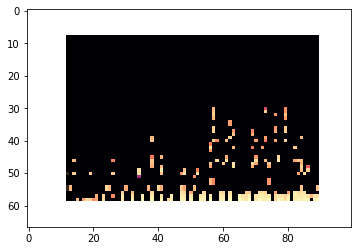

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0])
plt.show()

In [8]:
# y의 정보 가지고 있는 곳
Xy_144008 = pd.read_csv('Xy_144008.csv').sort_values('id')
Xy_144008 = Xy_144008.reset_index()


labels = []
for i in range(9665):
    labels.append(Xy_144008['cluster_km'][i])
    
#Xy_144008
#Xy_144008['cluster_km'][0]
#Xy_144008['cluster_km'][9664]

#labels
#len(labels)

##### 딥러닝에 맞게 어레이형으로 변형

In [9]:
train_data = np.array(data)
train_labels = np.array(labels)
#train_data
train_labels

array([3, 2, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
train_data.shape

(9665, 67, 100, 3)

##### Train 과 Test 분리

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_data,train_labels,
                                                   test_size=0.3,
                                                   random_state=7) 


# 데이터들의 크기 확인하기
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6765, 67, 100, 3), (2900, 67, 100, 3), (6765,), (2900,))

##### Data Preprocessing

In [12]:
# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
# One-hot encode target classes
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
y_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

##### VGG-16 Model

In [9]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
#import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras import regularizers
from keras import layers, models
#from keras.applications import VGG16   <- 이거 안되서 아래로 다른 이름으로 넣음
from keras.applications.vgg16 import VGG16
from keras import Input
from keras.models import Model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import numpy as np

##### 모델 시도 1
- https://towardsdatascience.com/transfer-learning-in-speech-emotion-recognition-d55b6616ba83

In [10]:
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(67, 100, 3))

In [11]:
# Next we freeze the convolution blocks: 

for layer in vgg_model.layers:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [12]:
# Then create our Dense layers:

x = vgg_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(8, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=vgg_model.input, outputs=x)

In [ ]:
##  얜 안되어서 그냥 마크 처리함

# And lastly, we compile and fit the model:

# optimizer=optimizers.Adam(lr=learning_rate)  이부분 수정해줌
#   에러뜸. 어디엔가 그지같은 데이터 쉐이프가 껴있는건가 
# 에러 : Shapes (1, 4) and (1, 8) are incompatible

# 메모리 문제도 있는 거 같아 배치 사이즈를 1 -> 1000 으로 변경 시도  : 안되는건 마찬가지 
# 아..........와...................
# 모르겠다. 이게 해결 될지도 모르겠고..https://www.tensorflow.org/guide/gpu

#learning_rate= 5e-5
#transfer_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=["accuracy"])
#history = transfer_model.fit(X_train, y_train, batch_size = 1, epochs=50, validation_data=(X_test,y_test))

##### 모델 시도 2
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=dnjswns2280&logNo=221738517884

In [10]:
# shape 변경해줌
input_tensor = Input(shape=(67, 100, 3), dtype='float32', name='input')

In [11]:
#vgg16 모델 불러오기
#shape 변경해줌
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(67, 100, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 67, 100, 3)]      0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 67, 100, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 67, 100, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 33, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 33, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 33, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 25, 128)       0     

In [12]:
from tensorflow.keras import optimizers

In [13]:
#vgg16 밑에 레이어 추가
#1.경고해결 lr -> learning_rate
#2.수정 binary_crossentropy -> categorical_crossentropy
#3. 에러 OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]
# -> 베치사이즈 줄여주거나 에포크 늘려줘야함.
# -> 첫번째 덴스 4096 ->  전체적으로 반절로 줄였더니 
# -> 에러 : failed to allocate memory [Op:AddV2]
#4. 마지막 덴스 출력을 4로 수정

additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(512, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(4, activation='softmax'))

additional_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
# VGG16 적용 시도2  추가 - 층 하나로 수정
additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())

additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))

additional_model.add(layers.Dense(4, activation='softmax'))

additional_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [17]:
# 훈련 시도 1 ----> 지금 여기 에러......가 이미지 사이즈 조정하니깐 해결됨.
# 에러 내용 : Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:
# GPU:0 in order to run _EagerConst: Dst tensor is not initialized.
# 혹시 몰라 베치 사이즈 변경해봄  50 -> 1000 해도 또같은 에러
history = additional_model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=3000, 
                    validation_data=(X_test, y_test))

Epoch 1/3000
136/136 [==============================] - 9s 43ms/step - loss: 123.4792 - acc: 0.3373 - val_loss: 81.3958 - val_acc: 0.4007
Epoch 2/3000
136/136 [==============================] - 5s 37ms/step - loss: 52.7411 - acc: 0.3525 - val_loss: 29.7573 - val_acc: 0.4007
Epoch 3/3000
136/136 [==============================] - 5s 37ms/step - loss: 19.4648 - acc: 0.3823 - val_loss: 12.7270 - val_acc: 0.4007
Epoch 4/3000
136/136 [==============================] - 5s 37ms/step - loss: 9.3582 - acc: 0.3820 - val_loss: 6.6564 - val_acc: 0.4007
Epoch 5/3000
136/136 [==============================] - 5s 37ms/step - loss: 5.0915 - acc: 0.3953 - val_loss: 3.8912 - val_acc: 0.4007
Epoch 6/3000
136/136 [==============================] - 5s 37ms/step - loss: 3.2367 - acc: 0.3965 - val_loss: 2.7416 - val_acc: 0.4007
Epoch 7/3000
136/136 [==============================] - 5s 37ms/step - loss: 2.4792 - acc: 0.3976 - val_loss: 2.2653 - val_acc: 0.4007
Epoch 8/3000
136/136 [==========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6810 - val_acc: 0.4007
Epoch 122/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6904 - acc: 0.3990 - val_loss: 1.6810 - val_acc: 0.4007
Epoch 123/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6809 - val_acc: 0.4007
Epoch 124/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6810 - val_acc: 0.4007
Epoch 125/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6810 - val_acc: 0.4007
Epoch 126/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6809 - val_acc: 0.4007
Epoch 127/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6809 - val_acc: 0.4007
Epoch 128/3000
136/136 [==============================] 

Epoch 181/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 182/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 183/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 184/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 185/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 186/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6808 - val_acc: 0.4007
Epoch 187/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6888 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 188/3000
136/136 [=================

Epoch 241/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 242/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 243/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 244/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 245/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 246/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 247/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 248/3000
136/136 [=================

Epoch 301/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6889 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 302/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 303/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 304/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 305/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 306/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 307/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6903 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 308/3000
136/136 [=================

Epoch 361/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 362/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 363/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 364/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 365/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 366/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6886 - acc: 0.3990 - val_loss: 1.6803 - val_acc: 0.4007
Epoch 367/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 368/3000
136/136 [=================

Epoch 421/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 422/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6884 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 423/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 424/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 425/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6807 - val_acc: 0.4007
Epoch 426/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 427/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 428/3000
136/136 [=================

Epoch 481/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 482/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 483/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 484/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 485/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 486/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 487/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 488/3000
136/136 [=================

Epoch 541/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 542/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6907 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 543/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 544/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 545/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 546/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 547/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 548/3000
136/136 [=================

Epoch 601/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 602/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 603/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 604/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 605/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 606/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6905 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 607/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6888 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 608/3000
136/136 [=================

Epoch 661/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 662/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 663/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 664/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 665/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 666/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 667/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 668/3000
136/136 [=================

Epoch 721/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6889 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 722/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 723/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 724/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 725/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 726/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 727/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6904 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 728/3000
136/136 [=================

Epoch 781/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 782/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 783/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 784/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 785/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6905 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 786/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 787/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 788/3000
136/136 [=================

Epoch 841/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 842/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 843/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 844/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 845/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6903 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 846/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 847/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 848/3000
136/136 [=================

Epoch 901/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 902/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 903/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 904/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 905/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 906/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 907/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 908/3000
136/136 [=================

Epoch 961/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 962/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6903 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 963/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6905 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 964/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 965/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 966/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 967/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 968/3000
136/136 [=================

136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1080/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6905 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1081/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1082/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1083/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6904 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1084/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6907 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1085/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1086/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1198/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1199/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1200/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1201/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6889 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1202/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1203/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1204/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1316/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1317/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1318/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1319/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1320/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1321/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6906 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1322/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 1434/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1435/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1436/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1437/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1438/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1439/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1440/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1552/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1553/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1554/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1555/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1556/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1557/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6903 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1558/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1670/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1671/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1672/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1673/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1674/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1675/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1676/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6889 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1788/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 1789/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1790/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6889 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1791/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1792/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1793/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1794/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1906/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6904 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1907/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1908/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6903 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 1909/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1910/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1911/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6904 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 1912/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2024/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2025/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2026/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2027/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2028/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2029/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2030/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2142/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2143/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2144/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2145/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2146/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2147/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2148/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2260/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2261/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6900 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2262/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2263/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2264/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6902 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2265/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2266/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2378/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2379/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2380/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2381/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2382/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2383/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2384/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2496/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2497/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2498/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2499/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6905 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2500/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2501/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2502/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2614/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2615/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2616/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6893 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2617/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2618/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2619/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2620/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2732/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2733/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2734/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2735/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2736/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2737/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2738/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6890 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2850/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6891 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2851/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2852/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2853/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6894 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2854/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6892 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2855/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2856/3000
136/136 [=========================

136/136 [==============================] - 5s 37ms/step - loss: 1.6901 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2968/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6806 - val_acc: 0.4007
Epoch 2969/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6896 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2970/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6897 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2971/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6895 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2972/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6898 - acc: 0.3990 - val_loss: 1.6804 - val_acc: 0.4007
Epoch 2973/3000
136/136 [==============================] - 5s 37ms/step - loss: 1.6899 - acc: 0.3990 - val_loss: 1.6805 - val_acc: 0.4007
Epoch 2974/3000
136/136 [=========================

In [16]:
# 훈련시도 2. 배치 수정 50->500
# 층설계도 단순화 해서 다시 핏 해봤으나 정확도 안올라감.........얜 이제 그냥 안녕.. 딴 모델 찾아보자
history = additional_model.fit(X_train, y_train, 
                    batch_size=500, 
                    epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/30
14/14 [==============================] - 4s 258ms/step - loss: 59.6583 - acc: 0.3224 - val_loss: 56.4270 - val_acc: 0.3969
Epoch 2/30
14/14 [==============================] - 3s 239ms/step - loss: 54.5748 - acc: 0.3421 - val_loss: 52.1471 - val_acc: 0.4007
Epoch 3/30
14/14 [==============================] - 3s 239ms/step - loss: 50.4615 - acc: 0.3500 - val_loss: 48.2473 - val_acc: 0.4007
Epoch 4/30
14/14 [==============================] - 3s 239ms/step - loss: 46.6141 - acc: 0.3494 - val_loss: 44.4962 - val_acc: 0.4003
Epoch 5/30
14/14 [==============================] - 3s 239ms/step - loss: 42.9507 - acc: 0.3534 - val_loss: 40.9475 - val_acc: 0.4007
Epoch 6/30
14/14 [==============================] - 3s 240ms/step - loss: 39.4610 - acc: 0.3599 - val_loss: 37.5389 - val_acc: 0.3997
Epoch 7/30
14/14 [==============================] - 3s 240ms/step - loss: 36.1152 - acc: 0.3616 - val_loss: 34.2955 - val_acc: 0.3997
Epoch 8/30
14/14 [==============================] - 3s 241ms/s

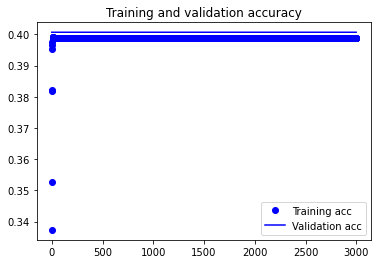

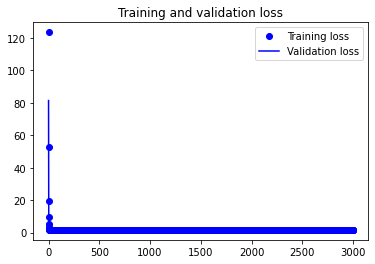

In [18]:
# 정확도 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# 모델저장
model_json = additional_model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)